# Simulering og modellering

## Pseudotilfeldig tallgenerator

* Når man skal kjøre simuleringer på datamaskin trenger man ofte å bruke tilfeldige tall
* Vi trenger elementer av tilfeldighet i simuleringene våres for å beskrive prossesser vi ikke kan forklare analytisk/matematisk
* Dette gjelder både i ingeniørfagene, men spesielt når man skal modellere *mennesklig adferd*

![newton](https://pbs.twimg.com/media/D2EZ4DwVAAApNdd?format=jpg&name=900x900)

* Faktisk tilfeldighet er vanskelig å oppdrive på kommando
* På datamaskinen gjør vi «mattetriks» til å generere tall som ser tilsynelatende tilfeldige ut
* I python finner vi metoder vi kan bruke i `random`biblioteket

In [38]:
import random
tilfeldig_tall = random.random()
#random() gir et "tilfeldig" flyttall mellom 0 og 1
print(f"Mitt tilfeldige tall er {tilfeldig_tall:.4f}")

Mitt tilfeldige tall er 0.9218


* De tilfeldige tallene regnes ut -- de bruker da en såkalt «*seed*» til å begynne utregningen
* Default er systemklokken på dataen -- men vi kan gi vår egen med `random.seed(«tall»)`

In [91]:
random.seed(10)

In [93]:
tilfeldig_tall = random.random()
#random() gir et "tilfeldig" flyttall mellom 0 og 1
print(f"Mitt tilfeldige tall er {tilfeldig_tall:.4f}")

Mitt tilfeldige tall er 0.4289


* Dersom man kan trekke et tilfeldig tall mellom 0 og 1, har man egentlig alt man trenger

9


(array([ 258.,  588.,  841., 1138., 1395., 1675., 1359., 1111.,  855.,
         513.,  267.]),
 array([ 2.        ,  2.90909091,  3.81818182,  4.72727273,  5.63636364,
         6.54545455,  7.45454545,  8.36363636,  9.27272727, 10.18181818,
        11.09090909, 12.        ]),
 <BarContainer object of 11 artists>)

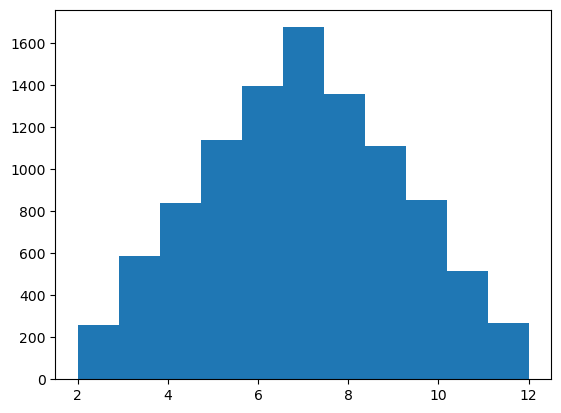

In [134]:
import matplotlib.pyplot as plt
#EKs terningkast
def kast_terning():
    kast = int(random.random()*6)+1
    return kast

def kast_to():
    return kast_terning()+kast_terning()
print(kast_to())

mange_kast = []
for _ in range(10000):
    mange_kast.append(kast_to())

plt.hist(mange_kast, bins=11)

In [152]:
# Trekk tilfeldig element fra liste
def trekk_tilfeldig(liste):
    n = len(mange_kast)
    tilfeldig_indeks = int(random.random()*n)
    return liste[tilfeldig_indeks]

print(f"Tilfeldig element i listen er {trekk_tilfeldig(mange_kast)}")

Tilfeldig element i listen er 3


* Av og til må man lage egne rutiner slik som dette
* Andre ganger kan vi bruke en av de mange innebygde funksjonene i `random` biblioteket
* [Dokumentasjon, random](https://docs.python.org/3/library/random.html)

In [179]:
frukt = ["Epler", "Pærer", "Mango", "Dragefrukt", "Fruktdrage"] 
#Velg et utvalg av 10 frukter
fruktkurv = random.choices(frukt, k=10)
print(f"Fruktkurven vår består av: {fruktkurv}")

#Velg et tilfeldig heltall mellom 10 og 100
tilfeldig_heltall = random.randint(10,100)
print(f"Tilfeldig heltall er: ", tilfeldig_heltall)

Fruktkurven vår består av: ['Pærer', 'Dragefrukt', 'Pærer', 'Pærer', 'Dragefrukt', 'Fruktdrage', 'Pærer', 'Pærer', 'Mango', 'Pærer']
Tilfeldig heltall er:  76


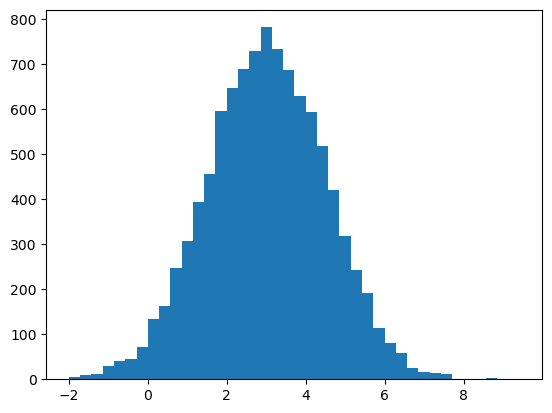

In [220]:
# Trekk et tilfeldig tall fra en normalfordeling:
tall = random.gauss(mu=3, sigma=1.5)
mange_tall = []
for _ in range(10000):
    tilf_trekk = random.gauss(mu=3, sigma=1.5) 
    mange_tall.append(tilf_trekk)
plt.hist(mange_tall, bins=40)
plt.show()

# Simulere med `While`
* Vi har blitt ganske godt kjent med `for`-løkken
* Den bruker vi når vi skal gjøre noe «for» alle elementene i en samling
* Vi vet altså på forhånd hvor mange ganger løkken skal iterere

* Dersom vi undersøker feks kundeadferd og bruker tilfeldige tall til å simulere avgjørelser vet man typisk ikke hvor mange ganger en løkke trenger å kjøre
* Da kan vi bruke `while` løkken



```python
while «boolsk uttrykk»:
    #Koded
    #Kode
    #Kode
```
* Løkken kjører så lenge det "boolske uttrykket" evalueres til `True`

* Dersom vi trenger å avbryte en løkke midt i en iterasjon kan vi bruke `break`
* Dersom vi trenger å starte løkken på nytt midt i en iterasjon kan vi bruke `continue`

In [258]:
sjekkevariabel = True
while sjekkevariabel:
    tilfeldig_tall = random.random()
    if tilfeldig_tall < 0.2:
        print("Vi avbryter")
        break
    else:
        print("Vi fortsetter")
        continue
    print("Her kommer vi aldri")
    

Vi fortsetter
Vi fortsetter
Vi avbryter


# EKS:
* Vi simulerer en kunde som handler
* Den fyller handlekurven med varer helt til budsjettet er tomt
* Eller kunden har fått det den trenger

* Vi sier at etter hver vare kunden handler, er det 10% sjanse for at den er ferdig å handle
* Kunden trekker en tilfeldig vare hver gang

In [272]:
varer = {"Epler": 10.0,
         "Pærer": 15.0,
         "Bleier": 35.0,
         "Sjokolade": 6.0,
         "Melk": 20.0,
         "Rundstykker": 13.0
        }

handlekurv = []
budsjett = 200
sluttsjanse = 0.1
total_pris = 0.0

varenavn = list(varer.keys())

shopper = True
while shopper:
    vare = random.choice(varenavn)
    varepris = varer[vare]
    if budsjett > varepris:
        handlekurv.append(vare)
        total_pris += varepris
        budsjett -= varepris
    else:
        shopper = False
    
    if random.random()<sluttsjanse:
        shopper = False

print(f"""Kunden handlet følgende varer {handlekurv}
Det koster kroner {total_pris:.1f}
Da er det igjen {budsjett} kroner i budsjettet
""")

Kunden handlet følgende varer ['Melk', 'Epler', 'Pærer', 'Pærer', 'Rundstykker', 'Epler', 'Bleier', 'Epler', 'Bleier', 'Epler', 'Melk']
Det koster kroner 193.0
Da er det igjen 7.0 kroner i budsjettet

